# **Youtube Video Summarization**

In today’s fast-paced world, keeping up with lengthy news reports, interviews, and podcasts is a challenge. Our AI-powered News & Podcast Summarizer solves this by transcribing, summarizing, and extracting key highlights, complete with speaker detection and multi-language support. It’s the ultimate tool for busy individuals to stay informed in minutes!

## **Install Dependencies**

---

In [1]:
%pip install yt-dlp
%pip install -q openai-whisper transformers torch
%pip install keybert
%pip install moviepy sumy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Import Libraries**

---



In [2]:
import yt_dlp
import whisper
from transformers import pipeline, MarianMTModel, MarianTokenizer
from keybert import KeyBERT
import torch
from moviepy.editor import VideoFileClip
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import logging
import os

# Configure logging
logging.basicConfig(level=logging.INFO)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Download YouTube Video**

---



In [ ]:
video_url = "https://www.youtube.com/watch?v=Cm4aeVHRt1w&t=1s"
output_path = "C:\\Users\\HP\\Desktop\\GenAI\\Video\\downloaded_video.mp4"

ydl_opts = {
    'format': 'best',  # Download the best available single file (video + audio)
    'outtmpl': output_path,
}

try:
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([video_url])
    print("Download completed!")
except Exception as e:
    print(f"An error occurred: {e}")

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cm4aeVHRt1w&t=1s
[youtube] Cm4aeVHRt1w: Downloading webpage
[youtube] Cm4aeVHRt1w: Downloading tv client config
[youtube] Cm4aeVHRt1w: Downloading player c8dbda2a
[youtube] Cm4aeVHRt1w: Downloading tv player API JSON
[youtube] Cm4aeVHRt1w: Downloading ios player API JSON
[youtube] Cm4aeVHRt1w: Downloading m3u8 information
[info] Cm4aeVHRt1w: Downloading 1 format(s): 18
[download] downloaded_video.mp4 has already been downloaded
[download] 100% of    3.15MiB
Download completed!


**Load Whisper Model**

---



In [4]:
def load_whisper_model(model_name="base"):
    try:
        model = whisper.load_model(model_name)
        logging.info(f"Loaded Whisper model: {model_name}")
        return model
    except Exception as e:
        logging.error(f"Error loading Whisper model: {e}")
        return None

**Extract Audio from Video**

---



In [ ]:
def extract_audio(video_path, audio_path="C:\\Users\\HP\\Desktop\\GenAI\\Audio\\extracted_audio.wav"):
    try:
        video = VideoFileClip(video_path)
        video.audio.write_audiofile(audio_path)
        logging.info(f"Audio extracted and saved to {audio_path}")
        return audio_path
    except Exception as e:
        logging.error(f"Error extracting audio: {e}")
        return None

**Transcribe Video**

---



In [9]:
def transcribe_video(video_path, model):
    try:
        logging.info("Transcribing video...")
        audio_path = extract_audio(video_path)
        if not audio_path:
            raise Exception("Audio extraction failed")
        transcript = model.transcribe(audio_path)["text"]
        logging.info("Transcription completed.")
        return transcript
    except Exception as e:
        logging.error(f"Error during transcription: {e}")
        return None

**Summarize Text Using BART**

---



In [10]:
def summarize_text(text):
    try:
        summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
        summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
        logging.info("Text summarized.")
        return summary[0]["summary_text"]
    except Exception as e:
        logging.error(f"Error during summarization: {e}")
        return None


**Extract Keywords (Using KeyBERT)**

---



In [11]:
kw_model = KeyBERT()

def extract_keywords(text, top_n=5):
    try:
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words="english", top_n=top_n)
        logging.info("Keywords extracted.")
        return [kw[0] for kw in keywords]
    except Exception as e:
        logging.error(f"Error during keyword extraction: {e}")
        return None

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


**Sentiment Analysis**

In [12]:
def analyze_sentiment(text):
    try:
        sentiment_pipeline = pipeline("sentiment-analysis")
        result = sentiment_pipeline(text)[0]
        logging.info("Sentiment analyzed.")
        return result["label"], result["score"]
    except Exception as e:
        logging.error(f"Error during sentiment analysis: {e}")
        return None, None

**Topic Modeling (Using LDA)**

In [13]:
def topic_modeling(texts, n_topics=3):
    try:
        vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
        dtm = vectorizer.fit_transform(texts)
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(dtm)
        logging.info("Topic modeling completed.")
        return lda, vectorizer
    except Exception as e:
        logging.error(f"Error during topic modeling: {e}")
        return None, None

**Named Entity Recognition (NER)**

In [14]:
def extract_entities(text):
    try:
        ner_pipeline = pipeline("ner", grouped_entities=True)
        entities = ner_pipeline(text)
        logging.info("Entities extracted.")
        return entities
    except Exception as e:
        logging.error(f"Error during NER: {e}")
        return None

**Visualize Keywords**

In [15]:
def plot_keywords(keywords):
    try:
        words, scores = zip(*keywords)
        plt.barh(words, scores)
        plt.xlabel("Importance")
        plt.title("Extracted Keywords")
        plt.show()
        logging.info("Keyword visualization generated.")
    except Exception as e:
        logging.error(f"Error during visualization: {e}")

**Translate Text**

In [16]:
def translate_text(text, target_lang="fr"):
    try:
        model_name = f"Helsinki-NLP/opus-mt-en-{target_lang}"
        tokenizer = MarianTokenizer.from_pretrained(model_name)
        model = MarianMTModel.from_pretrained(model_name)
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        translated = model.generate(**inputs)
        translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
        logging.info(f"Text translated to {target_lang}.")
        return translated_text
    except Exception as e:
        logging.error(f"Error during translation: {e}")
        return None

**Main Function**

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\__init__.py:69: UserWarning: C:\Users\HP\.cache\whisper\base.pt exists, but the SHA256 checksum does not match; re-downloading the file
  warnings.warn(
100%|███████████████████████████████████████| 139M/139M [00:31<00:00, 4.62MiB/s]
INFO:root:Loaded Whisper model: base
INFO:root:Transcribing video...


MoviePy - Writing audio in extracted_audio.wav


INFO:root:Audio extracted and saved to extracted_audio.wav            
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


MoviePy - Done.


INFO:root:Transcription completed.


Transcript:  What is Python programming? Today we are diving into the world of programming and we are going to talk about one of the most popular programming languages out there. Python. So what exactly is Python? In simple terms, Python is a high level, interpreted programming language that's known for its simplicity and readability. It's like having a Swiss army knife in your coding toolkit, versatile and powerful. But why is Python so popular? Let's break it down. Easy to learn. Python syntax is clear and concise, making it a great choice for beginners. You don't need to be a coding genius to get started. Very subtle. Python supports multiple programming paradigms, including procedural, object oriented and functional programming. Rich libraries. There is the vast ecosystem of libraries and frameworks like the Django for web development and pandas for data and Alisa. That extends Python's capabilities. Community support. Python has large and active community, which means a wealth of 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
INFO:root:Text summarized.


Summary: Python is a high level, interpreted programming language that's known for its simplicity and readability. It's like having a Swiss army knife in your coding toolkit, versatile and powerful. Python syntax is clear and concise, making it a great choice for beginners.


INFO:root:Keywords extracted.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Keywords: python syntax, python, powerful python, programming language, python high


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
INFO:root:Sentiment analyzed.
ERROR:roo

Sentiment: POSITIVE (Score: 0.9997708201408386)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetune

Named Entities: [{'entity_group': 'MISC', 'score': np.float32(0.9408683), 'word': 'Python', 'start': 9, 'end': 15}, {'entity_group': 'MISC', 'score': np.float32(0.96025485), 'word': 'Python', 'start': 167, 'end': 173}, {'entity_group': 'MISC', 'score': np.float32(0.9576115), 'word': 'Python', 'start': 194, 'end': 200}, {'entity_group': 'MISC', 'score': np.float32(0.9196933), 'word': 'Python', 'start': 219, 'end': 225}, {'entity_group': 'MISC', 'score': np.float32(0.99805474), 'word': 'Swiss', 'start': 344, 'end': 349}, {'entity_group': 'MISC', 'score': np.float32(0.94476753), 'word': 'Python', 'start': 420, 'end': 426}, {'entity_group': 'MISC', 'score': np.float32(0.9728864), 'word': 'Python', 'start': 475, 'end': 481}, {'entity_group': 'MISC', 'score': np.float32(0.8466129), 'word': 'Python', 'start': 617, 'end': 623}, {'entity_group': 'MISC', 'score': np.float32(0.7706671), 'word': 'Django', 'start': 812, 'end': 818}, {'entity_group': 'MISC', 'score': np.float32(0.625761), 'word': 'A

ERROR:root:Error during translation: 
MarianTokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.



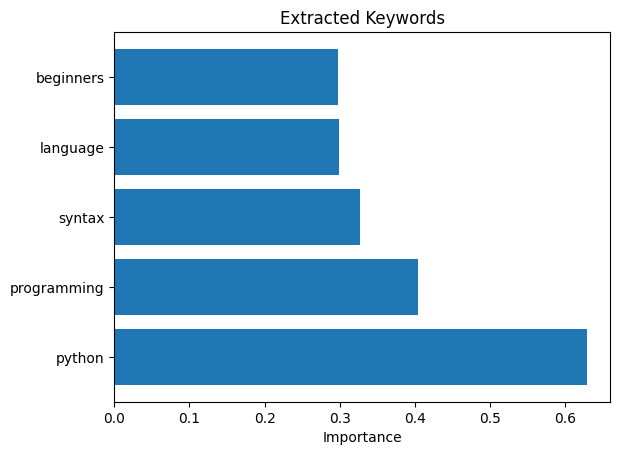

INFO:root:Keyword visualization generated.


In [18]:
def main(video_path):
    # Step 1: Load Whisper model
    model = load_whisper_model("base")
    if not model:
        return

    # Step 2: Transcribe the video
    transcript = transcribe_video(video_path, model)
    if not transcript:
        return
    print("Transcript:", transcript)

    # Step 3: Summarize the transcript
    summary = summarize_text(transcript)
    if not summary:
        return
    print("Summary:", summary)

    # Step 4: Extract Keywords
    keywords = extract_keywords(summary)
    if not keywords:
        return
    print("Keywords:", ", ".join(keywords))

    # Step 5: Sentiment Analysis
    sentiment, score = analyze_sentiment(summary)
    if sentiment:
        print(f"Sentiment: {sentiment} (Score: {score})")

    # Step 6: Topic Modeling
    lda, vectorizer = topic_modeling([transcript])
    if lda and vectorizer:
        print("Topics identified.")

    # Step 7: Named Entity Recognition
    entities = extract_entities(transcript)
    if entities:
        print("Named Entities:", entities)

    # Step 8: Translation
    target_language = input("Enter target language code (e.g., 'fr' for French, 'es' for Spanish, 'de' for German): ")
    translated_summary = translate_text(summary, target_lang=target_language)
    if translated_summary:
        print(f"Translated Summary ({target_language}):", translated_summary)

    # Step 9: Visualize Keywords
    plot_keywords(kw_model.extract_keywords(summary))

# Batch processing for multiple videos
def process_videos_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".mp4"):
            video_path = os.path.join(folder_path, filename)
            print(f"Processing {filename}...")
            main(video_path)

# Example usage
video_path = "C:\\Users\\HP\\Desktop\\GenAI\\Video\\downloaded_video.mp4"  # Replace with your video file path
main(video_path)

# To process all videos in a folder:
# process_videos_in_folder("/path/to/video/folder")